# <center><font color=red>**Projet Analyse et fouille de données**
### <div style="text-align: right;">**Khedri Maha 2BDAD2**</div>  <div style="text-align: right;">**khedrimaha@gmail.com**</div>

# Table des matières
### 1. [Importation des outils](#importation-des-outils)
### 2. [Ames Housing Dataset ](#contexte-du-dataset-ames-housing)
### 3. [préparation et nettoyage du jeu de données](##préparation-du-jeu-de-données--nettoyage-et-gestion-des-valeurs-manquantes)
### 4. [Paramètres statistiques usuels](#paramètres-statistiques-usuels)
### 5. [Analyses univariées](#analyses-univariées)
### 6. [Analyses bivariées](#analyses-bivariées)
### 7. [Analyses multiivariées](#analyses-multivariées)
### 8. [K-means](#k-means)
### 8. [Classification Ascendante Hiérarchique](#classification-ascendante-hiérarchique)

# Importation des outils


In [ ]:
# Importation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

plt.style.use('ggplot')

In [ ]:
# Importation du dataset Ames Housing
df=pd.read_csv(r'C:\Users\DELL\Downloads\AmesHousing.csv')

# Contexte du dataset Ames Housing

##### Le dataset "Ames Housing" a été créé par Dean De Cock dans le but de proposer une alternative plus complexe et réaliste au célèbre dataset "Boston Housing" utilisé en apprentissage automatique. Il contient des informations détaillées sur les ventes de maisons à Ames, Iowa (États-Unis), sur une période couvrant plusieurs années.

##### Ce jeu de données est largement utilisé pour des projets de régression, notamment pour prédire le prix de vente d’une maison (SalePrice) en fonction de nombreuses caractéristiques.

##### Il se distingue par la richesse de ses variables : il comporte plus de 70 colonnes, qui couvrent à la fois des données numériques (ex. : surface habitable, année de construction) et catégorielles (ex. : type de garage, style de maison, quartier).

##### Ce dataset est idéal pour explorer :

- la préparation des données (nettoyage, gestion des valeurs manquantes, encodage),

- l’analyse exploratoire (EDA).

- la modélisation prédictive (régression linéaire, arbres de décision, etc.).

- la sélection de variables importantes qui influencent le prix d'une maison.

In [ ]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


#### <font color=red> --> La commande df.head() en Python (avec pandas) permet d’afficher les 5 premières lignes du dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

#### <font color=red> --> Le dataset Ames Housing comprend 2930 observations et 82 variables décrivant les caractéristiques des maisons à Ames, Iowa, avec comme objectif principal la prédiction du prix de vente (SalePrice).
#### Types de données :
- 28 colonnes numériques :
Ces colonnes contiennent des valeurs continues ou discrètes (ex. : surface du terrain, surface habitable, nombre de chambres).
- 43 colonnes catégorielles :Ces colonnes représentent des caractéristiques qualitatives, telles que le type de rue, le type de toiture, ou encore le quartier.Certaines colonnes comportent des valeurs manquantes, telles que Alley, Mas Vnr Type, et Pool QC, ce qui peut nécessiter un traitement spécifique .

# Préparation du Jeu de Données : Nettoyage et Gestion des Valeurs Manquantes

### 1/Supprimer la colonne PID(ID):

In [ ]:
df = df.drop(columns=['PID'])

### 2/Gérer les valeurs manquantes:

In [ ]:
# Calculer le pourcentage de valeurs manquantes
pourcentage= (df.isnull().sum() / len(df)) * 100
# Afficher les colonnes avec des valeurs manquantes et leur pourcentage
print(pourcentage[pourcentage > 0].sort_values(ascending=False))

Pool QC           99.556314
Misc Feature      96.382253
Alley             93.242321
Fence             80.477816
Mas Vnr Type      60.580205
Fireplace Qu      48.532423
Lot Frontage      16.723549
Garage Cond        5.426621
Garage Qual        5.426621
Garage Finish      5.426621
Garage Yr Blt      5.426621
Garage Type        5.358362
Bsmt Exposure      2.832765
BsmtFin Type 2     2.764505
Bsmt Cond          2.730375
Bsmt Qual          2.730375
BsmtFin Type 1     2.730375
Mas Vnr Area       0.784983
Bsmt Half Bath     0.068259
Bsmt Full Bath     0.068259
BsmtFin SF 1       0.034130
Garage Cars        0.034130
Garage Area        0.034130
Total Bsmt SF      0.034130
Bsmt Unf SF        0.034130
BsmtFin SF 2       0.034130
Electrical         0.034130
dtype: float64


#### a- Si une colonne a plus de 40% de valeurs manquantes, on la supprime:

In [ ]:
# Identifier les colonnes avec plus de 40% de valeurs manquantes
colonnes_supprimer = pourcentage[pourcentage > 40].index
# Supprimer les colonnes avec plus de 40% de valeurs manquantes
df = df.drop(columns=colonnes_supprimer)

#### b- Pour les colonnes ayant moins de 40% de valeurs manquantes, on remplace les valeurs manquantes par la médiane (pour les variables numériques) ou le mode (pour les variables catégorielles) :

In [ ]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:  # Colonnes numériques
            df[col] = df[col].fillna(df[col].median())
        else:  # Colonnes catégorielles
            df[col] = df[col].fillna(df[col].mode()[0])

#### c- Verification :

In [ ]:
# Calculer le pourcentage de valeurs manquantes
pourcentage= (df.isnull().sum() / len(df)) * 100
# Afficher les colonnes avec des valeurs manquantes et leur pourcentage
print(pourcentage[pourcentage > 0].sort_values(ascending=False))

Series([], dtype: float64)


#### <font color=red> --> Aucune valeur manquante.

### 3/Gérer les doublons:

In [ ]:
doublons = df.duplicated().sum()
print(doublons)

0


#### <font color=red> --> Il n'y a aucune ligne dupliquée dans le DataFrame

# Paramètres statistiques usuels

### 1/Table de statistiques descriptives:

In [ ]:
df.describe()

,Order,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,57.387372,69.019795,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.096928,442.604778,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,42.638025,21.326422,7880.017759,1.411026,1.111537,30.245361,20.860286,178.634545,455.515036,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,20.000000,60.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,70.000000,78.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,162.750000,734.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### 2/la distribution de fréquence:

In [ ]:
df['MS Zoning'].value_counts()


MS Zoning
RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: count, dtype: int64

#### <font color=red> --> La fonction value_counts montre la distribution de fréquence de la variable MS Zoning
#### La variable 'MS Zoning' indique la classification des zones dans lesquelles se trouvent les propriétés. Elle contient différentes catégories :
- RL (Residential Low Density) : Zones résidentielles à faible densité (majoritaire avec 2273 enregistrements).
- RM (Residential Medium Density) : Zones résidentielles à densité moyenne (462 enregistrements).
- FV (Floating Village Residential) : Zones résidentielles flottantes (139 enregistrements).
- RH (Residential High Density) : Zones résidentielles à haute densité (27 enregistrements).
- C (all) : Zones commerciales (25 enregistrements).
- I (all) : Zones industrielles (2 enregistrements).
- A (agr) : Zones agricoles (2 enregistrements).

### 3/Moyenne:

In [ ]:
mean_overallqual = df['Overall Qual'].mean()
print(f"Moyenne de OverallQual: {mean_overallqual}")

Moyenne de OverallQual: 6.0948805460750854


#### <font color=red> --> La moyenne de 'OverallQual' (mesure la qualité générale d'une maison) est de 6.09, ce qui signifie que, en moyenne, les maisons du dataset ont une qualité générale modérée, légèrement au-dessus de la moitié de l'échelle (de 1 à 10).

### 4/Médiane:

In [ ]:
median_grlivarea = df['Gr Liv Area'].median()
print(f"Médiane de GrLivArea: {median_grlivarea}")

Médiane de GrLivArea: 1442.0


#### <font color=red> --> La médiane de "GrLivArea" (surface habitable au-dessus du sol en pieds carrés) de 1442.0 signifie que la moitié des maisons ont une superficie habitable au rez-de-chaussée inférieure à 1442 pieds carrés, et l'autre moitié a une superficie supérieure.

### 5/Plage(min,max):

In [ ]:
print("min=",df['Year Built'].min())
print("max=",df['Year Built'].max())
range_yearbuilt = df['Year Built'].max() - df['Year Built'].min()
print(f"Plage de YearBuilt: {range_yearbuilt}")

min= 1872
max= 2010
Plage de YearBuilt: 138


#### <font color=red> --> La plage de "YearBuilt" de 138 signifie que les maisons du dataset ont été construites sur une période de 138 ans, de 1872 à 2010.

### 6/Mode:

In [ ]:
mode_saleprice = df['SalePrice'].mode()[0]
print(f"Mode de SalePrice: {mode_saleprice}")

Mode de SalePrice: 135000


#### <font color=red> --> Le mode de la colonne 'SalePrice' étant 135000, cela signifie que 135000 est le prix de vente le plus fréquemment observé parmi toutes les maisons dans votre dataset. En d'autres termes, 135000 est la valeur la plus courante dans la distribution des prix de vente.

### 7/Variance et Écart-type:

In [ ]:
variance_totrms = df['TotRms AbvGrd'].var()
std_dev_totrms = df['TotRms AbvGrd'].std()
print(f"Variance de TotRmsAbvGrd: {variance_totrms}")
print(f"Écart-type de TotRmsAbvGrd: {std_dev_totrms}")

Variance de TotRmsAbvGrd: 2.474216992135853
Écart-type de TotRmsAbvGrd: 1.5729643963344666


#### <font color=red> --> La variance de 2.47 et l'écart-type de 1.57 indiquent que le nombre de pièces au-dessus du rez-de-chaussée varie modérément autour de la moyenne. Les maisons ont en général un nombre similaire de pièces, avec des écarts d'environ 1.57 pièces autour de la moyenne.

### 8/Variance et Écart-type:

In [ ]:
print('1er quartile :',df['SalePrice'].quantile(0.25))
print('2è quartile :',df['SalePrice'].quantile(0.5))
print('3è quartile :',df['SalePrice'].quantile(0.75))

1er quartile : 129500.0
2è quartile : 160000.0
3è quartile : 213500.0


In [ ]:
Q1_saleprice = df['SalePrice'].quantile(0.25)
Q3_saleprice = df['SalePrice'].quantile(0.75)
IQR_saleprice = Q3_saleprice - Q1_saleprice
IQR_saleprice

84000.0

#### <font color=red> --> Un IQR (Intervalle Interquartile) de 84,000 pour la variable 'SalePrice' indique que l'écart entre le 25e et le 75e percentile des prix de vente des maisons dans votre dataset est de 84,000. En d'autres termes, la plupart des maisons se situent dans une fourchette de 84,000 entre ces deux quartiles, indiquant une différence significative de prix dans cette plage.
- 1er quartile (Q1) : 129500.0
   * Le 1er quartile représente la valeur en dessous de laquelle se trouvent 25 % des prix de vente. Cela signifie qu'un quart des maisons du dataset ont un prix de vente inférieur à 129500.
   * En d'autres termes, 129500 est la limite inférieure de 25 % des maisons les moins chères dans cet ensemble de données.
- 2e quartile (Q2, ou médiane) : 160000.0
   * La médiane est la valeur centrale du dataset. 50 % des maisons ont un prix de vente inférieur à 160000, et l'autre 50 % ont un prix supérieur à cette valeur.
   * Cela signifie que 160000 est le prix médian de vente des maisons dans cet ensemble de données.
- 3e quartile (Q3) : 213500.0
   * Le 3e quartile représente la valeur en dessous de laquelle se trouvent 75 % des prix de vente. Cela signifie que 75 % des maisons dans cet ensemble de données ont un prix de vente inférieur à 213500.
   * En d'autres termes, 213500 est la limite supérieure de 75 % des maisons dans le dataset, et le 25 % restant a des prix supérieurs à cette valeur.

# Analyses univariées

## 1. Analyses univariées sur les variables catégorielles :

- La variable Neighborhood représente le quartier où se situe chaque maison dans la ville d’Ames.
-  C’est une variable catégorielle avec plusieurs modalités, chacune correspondant à un quartier différent. 

In [ ]:
print(df['Neighborhood'].unique())

['NAmes' 'Gilbert' 'StoneBr' 'NWAmes' 'Somerst' 'BrDale' 'NPkVill'
 'NridgHt' 'Blmngtn' 'NoRidge' 'SawyerW' 'Sawyer' 'Greens' 'BrkSide'
 'OldTown' 'IDOTRR' 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor'
 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'Veenker' 'GrnHill' 'Landmrk']


In [ ]:
# Fréquences absolues
freq_abs = df['Neighborhood'].value_counts()
print(freq_abs)

# Fréquences relatives (%)
freq_rel = df['Neighborhood'].value_counts(normalize=True) * 100
print(freq_rel.round(2))

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64
Neighborhood
NAmes      15.12
CollgCr     9.11
OldTown     8.16
Edwards     6.62
Somerst     6.21
NridgHt     5.67
Gilbert     5.63
Sawyer      5.15
NWAmes      4.47
SawyerW     4.27
Mitchel     3.89
BrkSide     3.69
Crawfor     3.52
IDOTRR      3.17
Timber      2.46
NoRidge     2.42
StoneBr     1.74
SWISU       1.64
ClearCr     1.50
MeadowV     1.26
BrDale      1.02
Blmngtn     0.96
Veenker     0.82
NPkVill     0.78
Blueste     0.34
Greens      0.27
GrnHill     0.07
Landmrk     0.03
Name: proportion, dtype: float64


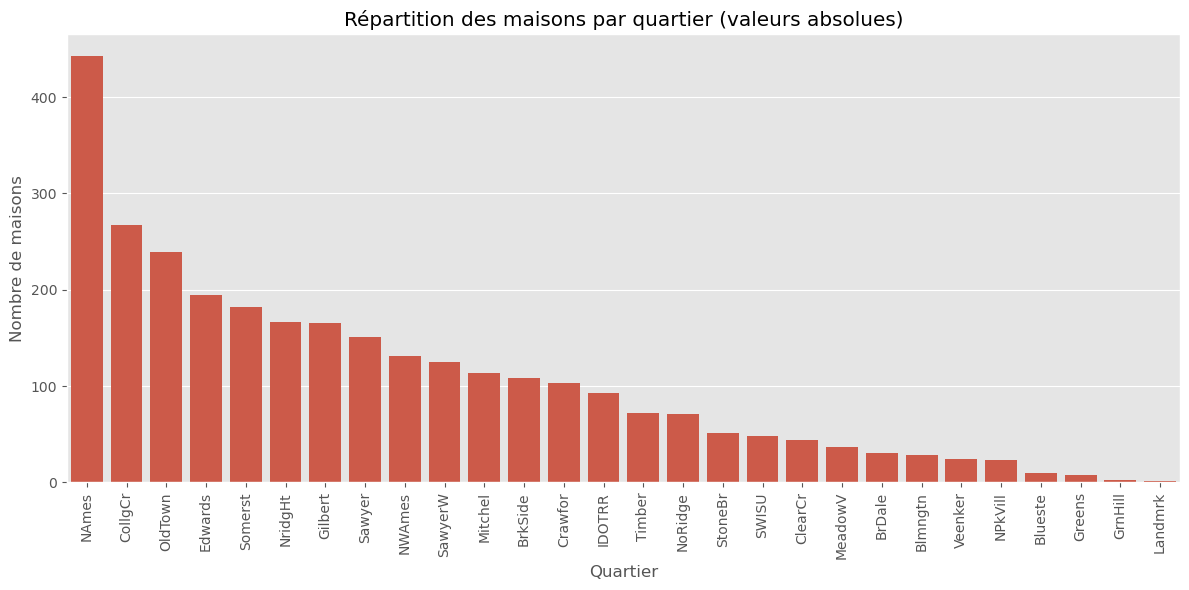

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Neighborhood', order=freq_abs.index)
plt.xticks(rotation=90)
plt.title('Répartition des maisons par quartier (valeurs absolues)')
plt.xlabel('Quartier')
plt.ylabel('Nombre de maisons')
plt.tight_layout()
plt.show()

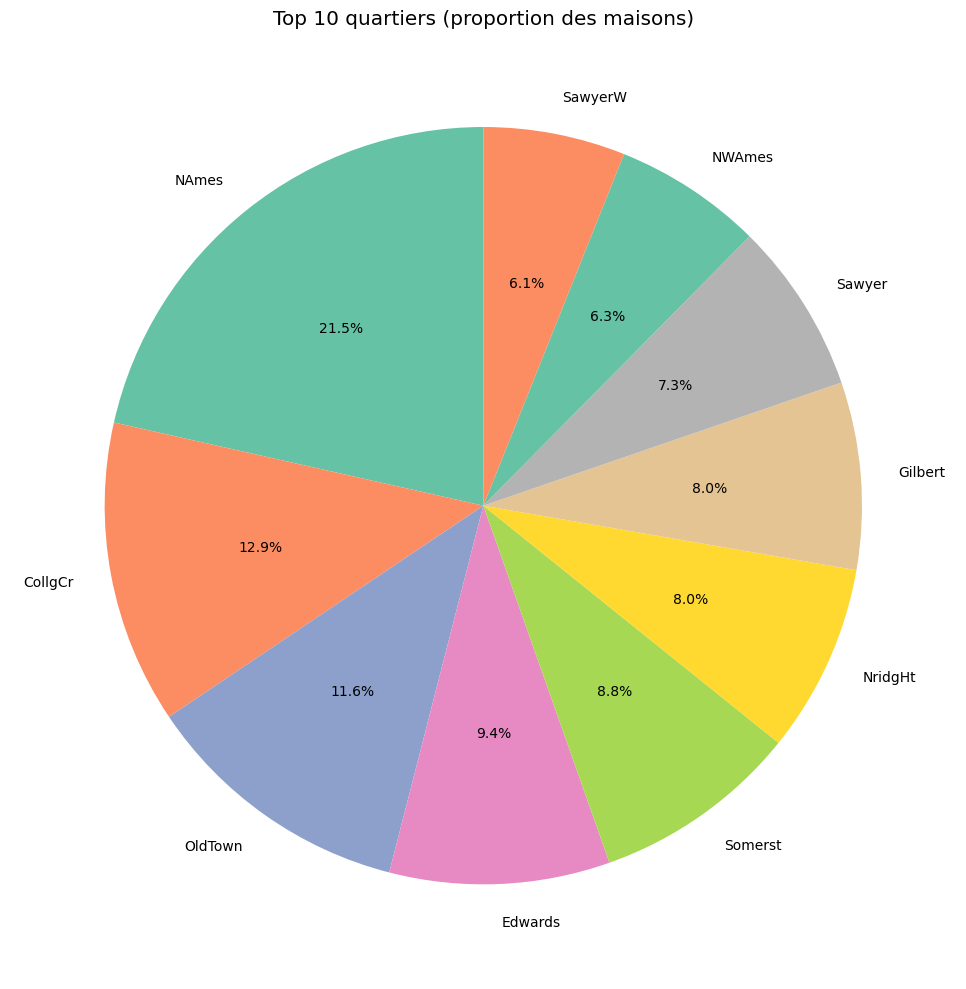

In [ ]:
plt.figure(figsize=(10, 10))
freq_abs[:10].plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title('Top 10 quartiers (proportion des maisons)')
plt.ylabel('')
plt.tight_layout()
plt.show()

#### <font color=red> --> Le résultat montre combien de maisons sont présentes dans chaque quartier du dataset. Par exemple :
-	Le quartier NAmes contient 443 maisons, c’est le plus représenté.
-	CollgCr en a 267, OldTown en a 239, etc.
-	Certains quartiers comme Landmrk ou GrnHill ont très peu d’observations (1 ou 2 maisons).


## 2. Analyses univariées sur les variables numériques :

### a. Variable continue :

- La variable SalePrice représente le prix de vente de chaque maison dans la ville d'Ames.
- C’est une variable numérique continue qui indique le montant pour lequel chaque propriété a été vendue. 

In [ ]:
print(df['SalePrice'].describe())

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


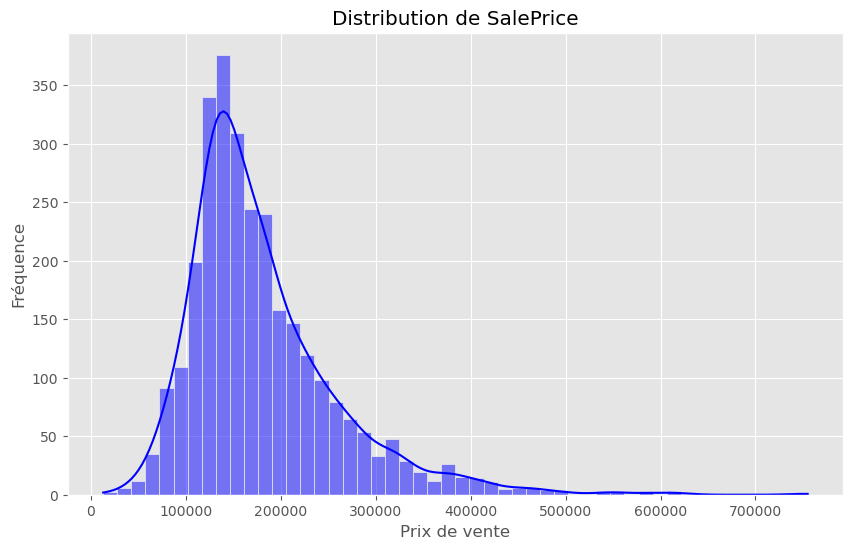

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=50, color='blue')
plt.title('Distribution de SalePrice')
plt.xlabel('Prix de vente')
plt.ylabel('Fréquence')
plt.show()

#### <font color=red> --> L'histogramme de 'SalePrice' montre que les prix de vente sont majoritairement concentrés sur la gauche de la distribution, ce qui signifie qu'une grande partie des maisons ont des prix relativement bas. Il y a probablement quelques maisons très chères qui créent une queue à droite (valeurs extrêmes), mais la majorité des prix se situe dans une plage plus modeste. Cela suggère une distribution asymétrique à droite.
1. Forme :
La distribution est asymétrique à droite, avec une majorité de maisons ayant des prix de vente plus bas. Une queue à droite est présente, ce qui signifie que quelques maisons ont des prix beaucoup plus élevés que la majorité.

2. Centre :
Le centre de la distribution se situe autour de 180,000 USD. Cela suggère que la médiane et la moyenne sont probablement proches, bien que la queue à droite puisse influencer légèrement la moyenne vers le haut.

3. Dispersion :
La dispersion des prix de vente est assez large, avec des prix allant de relativement bas à très élevés. Les 1er et 3e quartiles (120,000 USD et 250,000 USD) capturent la majorité des données, et l'IQR reflète la variabilité des prix sans être affecté par les valeurs extrêmes.

4. Outliers (valeurs aberrantes) :
Les outliers sont présents dans la queue à droite de la distribution, où l'on observe des maisons dont les prix sont beaucoup plus élevés que la majorité. Ces valeurs peuvent être identifiées comme des outliers en utilisant l'IQR, par exemple, toute valeur supérieure à 250,000 + 1,5 * IQR pourrait être considérée comme un outlier.

In [ ]:
# Fonction pour trouver les outliers
def finding_outliers(data, variable_name):
    '''
    data : dataframe Pandas
    variable_name : chaîne de caractères (string)
    '''
    # Calcul de l'IQR
    iqr = stats.iqr(data[variable_name])
    # Calcul de Q1 - 1,5 * IQR (borne inférieure)
    lower = np.quantile(data[variable_name], 0.25) - 1.5 * iqr
    # Calcul de Q3 + 1,5 * IQR (borne supérieure)
    upper = np.quantile(data[variable_name], 0.75) + 1.5 * iqr
    # Affichage des résultats
    print(f'IQR: {iqr}, Lower Bound: {lower}, Upper Bound: {upper}')
    # Retourner les points de données aberrants
    return data[(data[variable_name] < lower) | (data[variable_name] > upper)]
# Exemple d'utilisation avec un DataFrame Ames Housing
outliers_saleprice = finding_outliers(data=df, variable_name='SalePrice')
# Affichage des outliers détectés
print(outliers_saleprice)


IQR: 84000.0, Lower Bound: 3500.0, Upper Bound: 339500.0
      Order  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
15       16           60        RL          47.0     53504   Pave       IR2   
17       18           20        RL          88.0     11394   Pave       Reg   
36       37           60        RL         102.0     12858   Pave       IR1   
38       39           20        RL          83.0     10159   Pave       IR1   
44       45           20        RL         100.0     12919   Pave       IR1   
...     ...          ...       ...           ...       ...    ...       ...   
2666   2667           75        RM          90.0     22950   Pave       IR2   
2737   2738           75        RL          60.0     19800   Pave       Reg   
2883   2884          120        RM          41.0      5748   Pave       IR1   
2901   2902           20        RL          88.0     11443   Pave       Reg   
2902   2903           20        RL          88.0     11577   Pave       Re

#### <font color=red> --> Le SalePrice de 538000 est au-dessus de la limite supérieure de 339500, ce qui en fait un outlier.

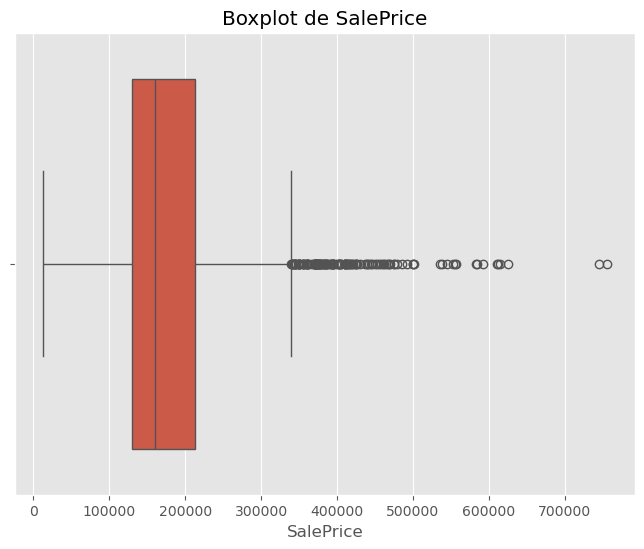

In [ ]:
# Boîte à moustache pour 'SalePrice'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['SalePrice'])
plt.title('Boxplot de SalePrice')
plt.show()

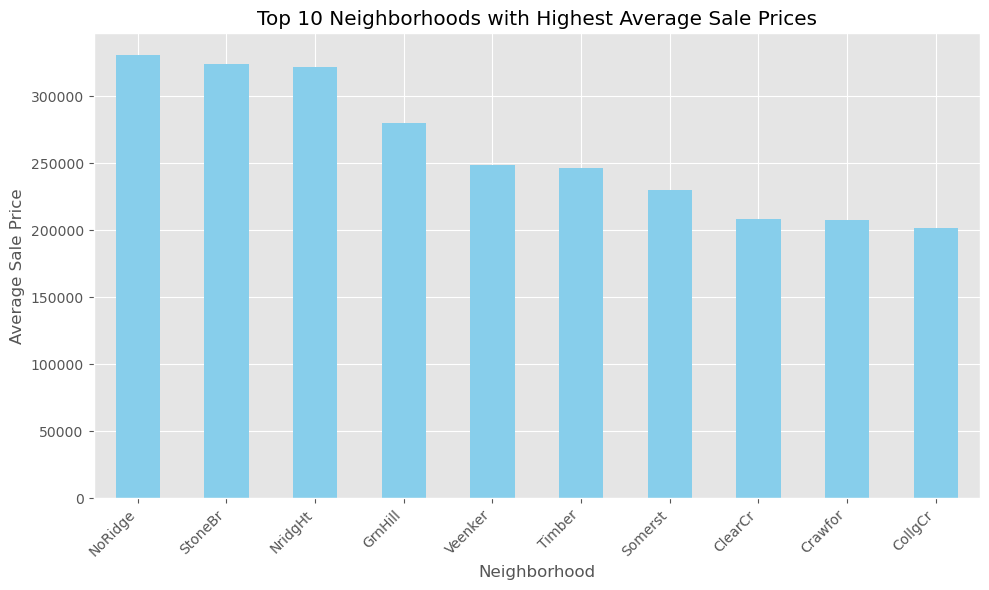

In [ ]:
top_areas = df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False).head(10)

# Plot the results
plt.figure(figsize=(10,6))
top_areas.plot(kind='bar', color='skyblue')
plt.title('Top 10 Neighborhoods with Highest Average Sale Prices')
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### b. Variable discrete :

- La variable OverallCond représente l'état général de la maison au moment de la vente.
-  C’est une variable discret dont les valeurs vont généralement de 1 à 9 '

In [ ]:
print(df['Overall Cond'].value_counts())

Overall Cond
5    1654
6     533
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: count, dtype: int64


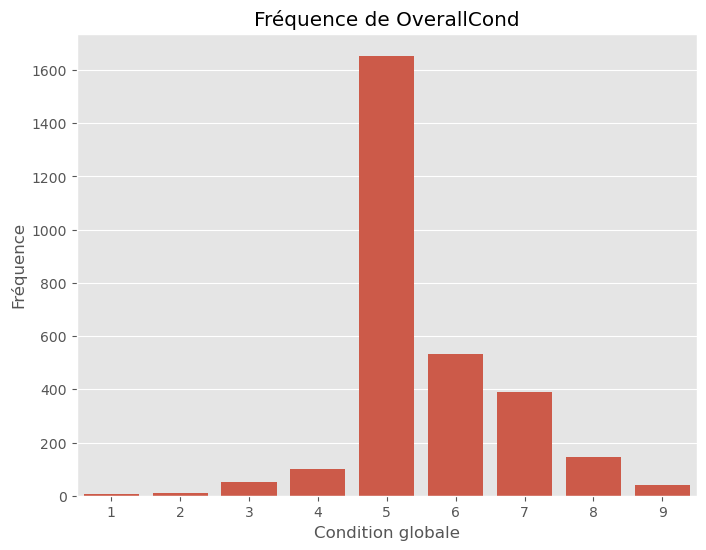

In [ ]:
# Diagramme à barres pour 'Overall Cond'
plt.figure(figsize=(8, 6))
sns.countplot(x='Overall Cond', data=df)
plt.title('Fréquence de OverallCond')
plt.xlabel('Condition globale')
plt.ylabel('Fréquence')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_5596\3555805611.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Overall Qual', y='Gr Liv Area', data=df, palette='coolwarm')


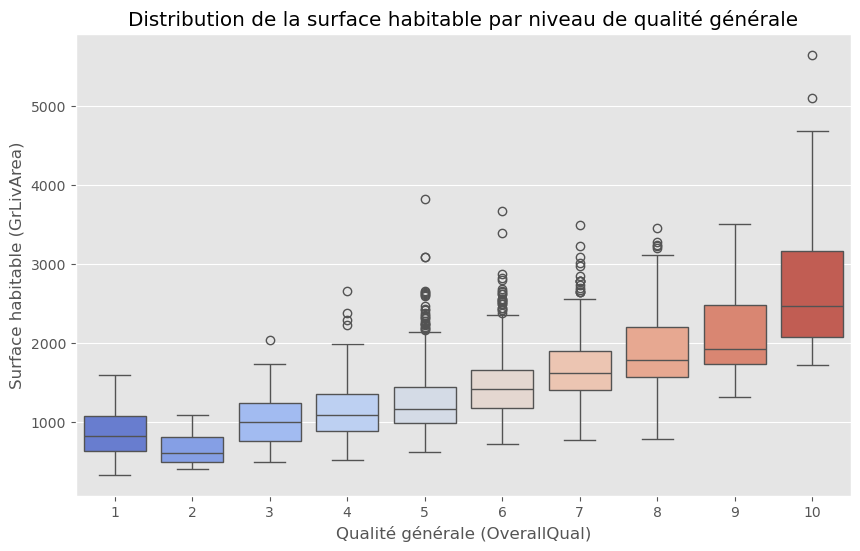

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Overall Qual', y='Gr Liv Area', data=df, palette='coolwarm')
plt.title('Distribution de la surface habitable par niveau de qualité générale')
plt.xlabel('Qualité générale (OverallQual)')
plt.ylabel('Surface habitable (GrLivArea)')
plt.show()


#### <font color=red> --> Le boxplot montre que plus la qualité générale (OverallQual) augmente, plus la surface habitable moyenne tend à augmenter.Les maisons avec une qualité faible (1 à 4) ont généralement une surface plus petite. En revanche, celles avec une qualité élevée (8 à 10) ont une surface bien plus grande, avec une médiane qui dépasse souvent 2000 pieds².Cette tendance confirme l’idée que les maisons de meilleure qualité sont souvent plus grandes, probablement parce qu’elles sont mieux construites, situées dans des quartiers plus recherchés ou destinées à des segments de marché plus haut de gamme.



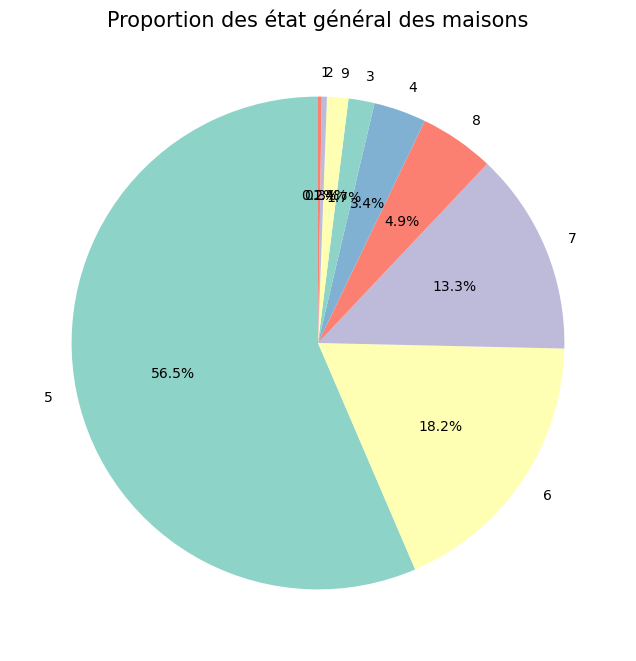

In [ ]:
# Diagramme circulaire pour 'Overall Cond
plt.figure(figsize=(8, 8))
df['Overall Cond'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', n_colors=5))

# Titres et labels
plt.title('Proportion des état général des maisons', fontsize=15)
plt.ylabel('')  # Supprimer le label de l'axe des y

# Affichage
plt.show()


# Analyses bivariées

## Relation entre variables quantitatives 

### 1/Nuage de Points :

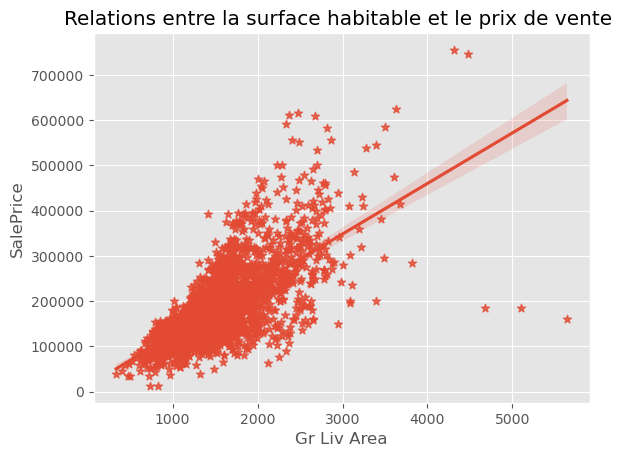

In [ ]:
sns.regplot(
    x="Gr Liv Area", 
    y="SalePrice", 
    fit_reg=True, 
    marker="*", 
    data=df).set_title('Relations entre la surface habitable et le prix de vente ');

- Relation positive : Le graphique montre une relation linéaire croissante entre la surface habitable (Gr Liv Area) et le prix de vente (SalePrice). Cela signifie que, plus une maison est grande, plus elle a tendance à coûter cher.

- Tendance globale : La droite de régression (en bleu) résume cette tendance générale, indiquant qu’en moyenne, une augmentation de la surface habitable est associée à une hausse du prix.

- Dispersion : Malgré la tendance claire, on observe une dispersion des points autour de la droite, surtout pour les grandes surfaces. Cela suggère qu’à surface égale, le prix peut varier en fonction d'autres facteurs (qualité, localisation, équipements, etc.).

- Valeurs aberrantes (outliers) : Quelques points très au-dessus de la droite indiquent des maisons particulièrement chères pour leur surface. Ce sont probablement des maisons de luxe ou avec des caractéristiques spéciales.

### 2/Coefficient de Corrélation de Pearson :

In [ ]:
stats.pearsonr(df['Gr Liv Area'], df['SalePrice'])

PearsonRResult(statistic=0.7067799209766279, pvalue=0.0)

#### <font color=red> --> Le coefficient de corrélation de Pearson entre la surface habitable (Gr Liv Area) et le prix de vente (SalePrice) est égal à 0.71 avec une p-valeur de 0.0. Cela indique une corrélation positive forte et statistiquement significative (p-valeur < 0.05) entre ces deux variables. En d'autres termes, plus la surface habitable d'une maison est grande, plus son prix de vente tend à augmenter, et cette relation est appuyée par des données statistiquement solides.

### 3/Carte des corrélations de Pearson :

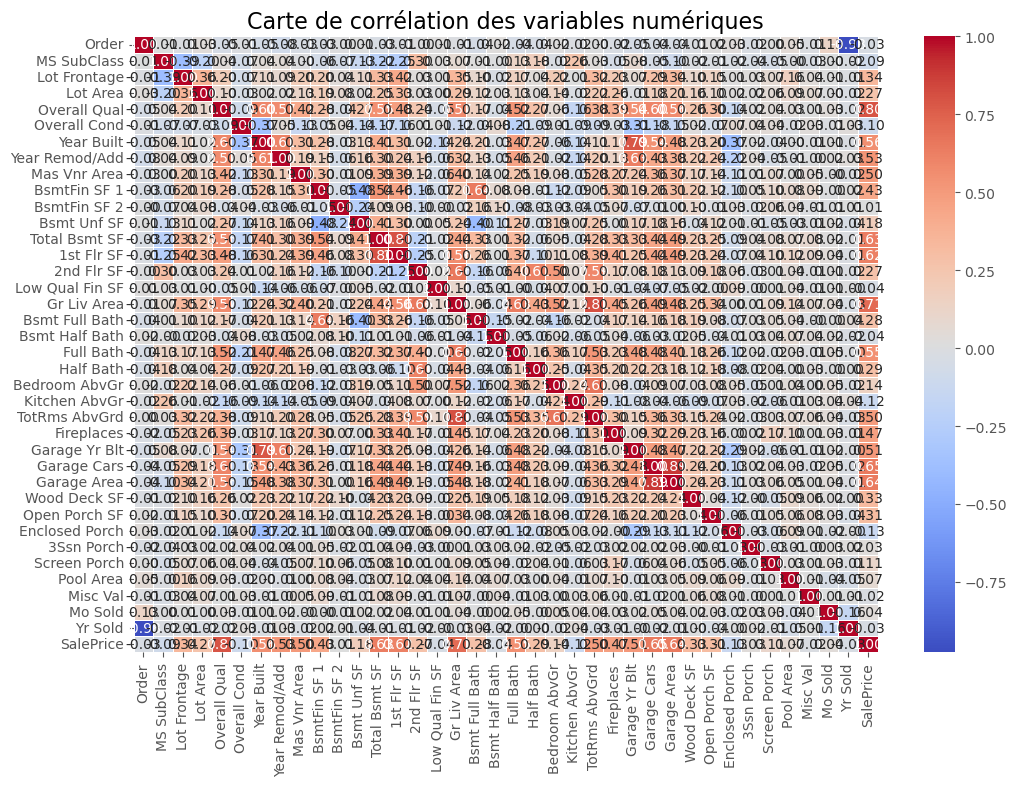

In [ ]:
# Sélection uniquement des variables numériques
numeric_df = df.select_dtypes(include=['number'])

# Carte de corrélation entre les variables numériques
plt.figure(figsize=(12, 8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)

# Titre
plt.title("Carte de corrélation des variables numériques", fontsize=16)
plt.show()


### 4/Carte des corrélations améliorée :

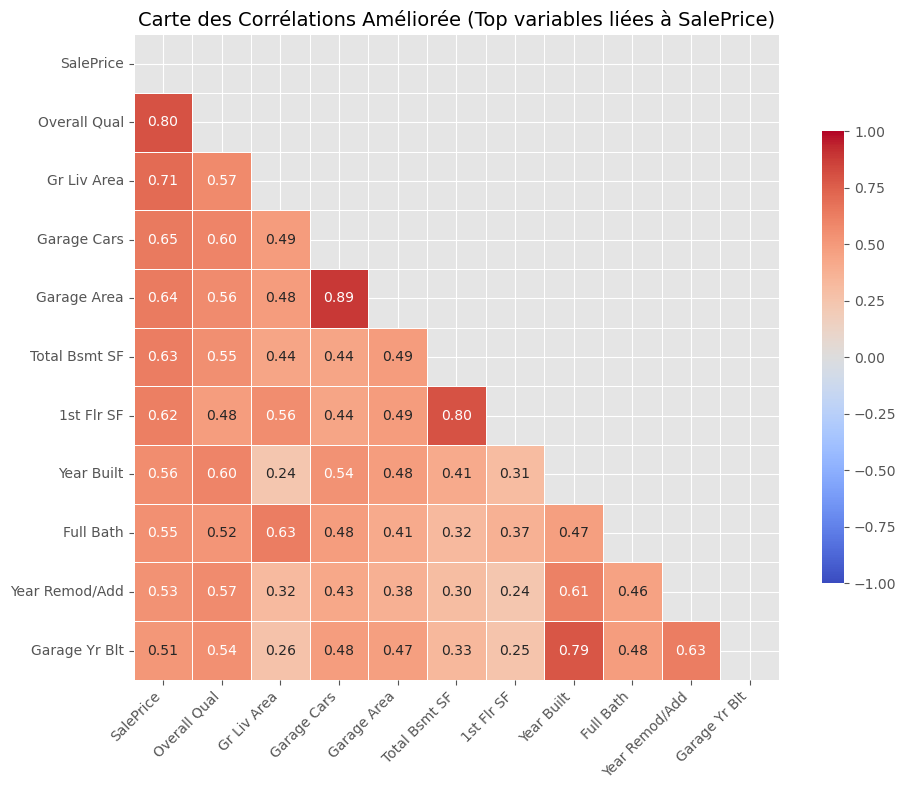

In [ ]:
# Sélection uniquement des variables numériques
numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr()

# Select top 10 variables most correlated with SalePrice
top_corr_vars = corr['SalePrice'].abs().sort_values(ascending=False).head(11).index
top_corr_matrix = corr.loc[top_corr_vars, top_corr_vars]

# Mask upper triangle
mask = np.triu(np.ones_like(top_corr_matrix, dtype=bool))

# Plot the improved heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    top_corr_matrix,
    mask=mask,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    vmin=-1,
    vmax=1
)
plt.title("Carte des Corrélations Améliorée (Top variables liées à SalePrice)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#### <font color=red> --> L’analyse de la carte des corrélations améliorée révèle que plusieurs variables quantitatives présentent une forte corrélation positive avec le prix de vente (SalePrice), notamment la qualité globale de la maison (OverallQual), la surface habitable au-dessus du sol (GrLivArea), la taille du garage (GarageCars, GarageArea) et la surface du sous-sol (TotalBsmtSF). Ces résultats indiquent que les caractéristiques liées à la taille, la qualité de construction et les commodités comme le garage jouent un rôle majeur dans la valorisation d’un bien immobilier. Ainsi, on peut conclure que le prix de vente des maisons à Ames est principalement influencé par des critères structurels et qualitatifs directement visibles et mesurables.

### 4/les relations conditionnelles entre variables :

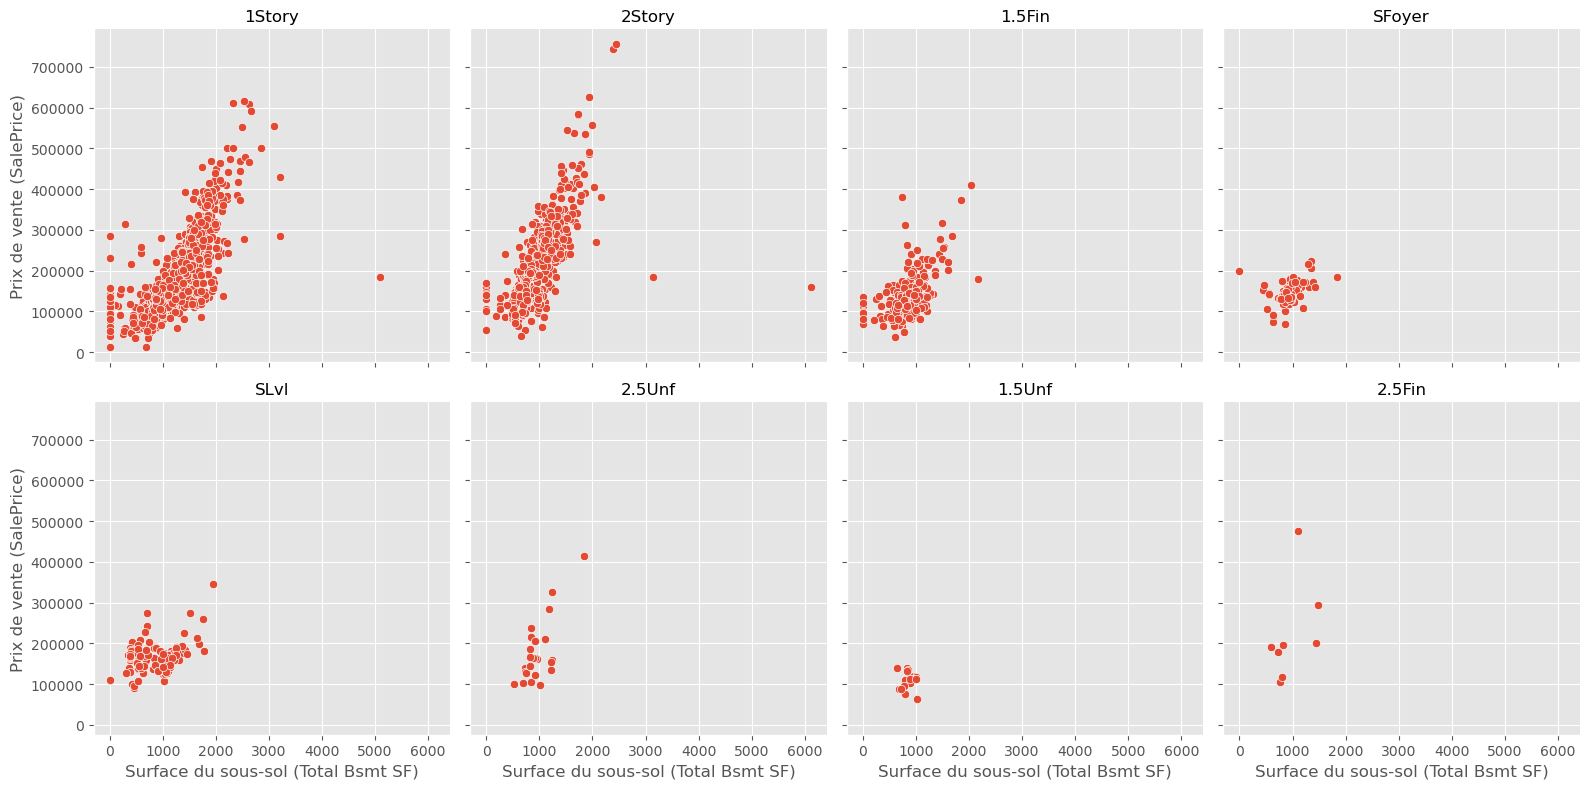

In [ ]:
g = sns.FacetGrid(df, col="House Style", col_wrap=4, height=4)
g.map(sns.scatterplot, "Total Bsmt SF", "SalePrice")
g.set_axis_labels("Surface du sous-sol (Total Bsmt SF)", "Prix de vente (SalePrice)")
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()

#### <font color=red> -->Les résultats montrent que la surface du sous-sol a un impact sur le prix de vente, mais cet impact varie en fonction du style de la maison. Les maisons avec une plus grande surface de sous-sol semblent avoir un avantage plus marqué sur le prix dans les maisons à un étage ou à plusieurs étages, tandis que dans les maisons de style duplex ou en série, l'impact de la surface du sous-sol est moins important.

### 5/Densité de points 2D :

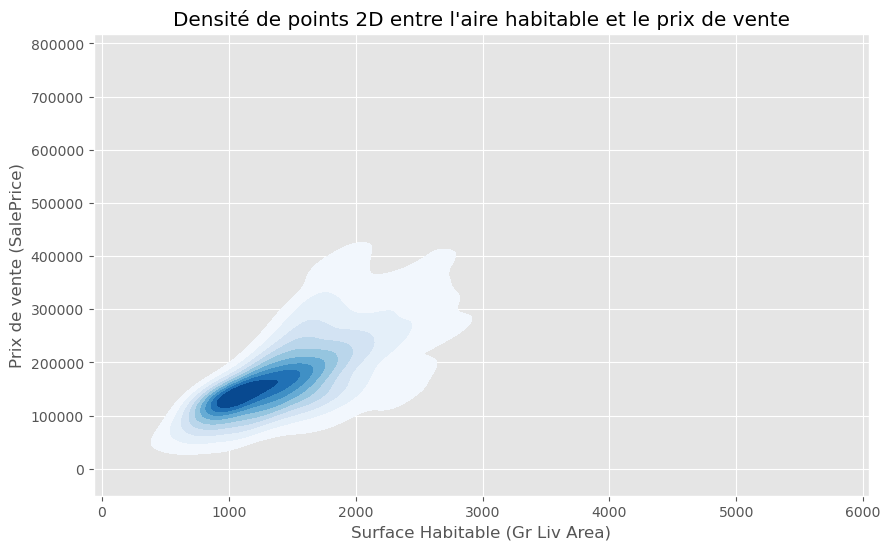

In [ ]:
# Density plot 2D
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df['Gr Liv Area'], y=df['SalePrice'], cmap="Blues", fill=True)
plt.title("Densité de points 2D entre l'aire habitable et le prix de vente")
plt.xlabel("Surface Habitable (Gr Liv Area)")
plt.ylabel("Prix de vente (SalePrice)")
plt.show()


#### <font color=red> -->Le graphique ci-dessus montre la densité conjointe du prix de vente et du surface habitable. Les couleurs plus foncées indiquent où se situe un plus grand nombre de points.

## Relation entre variables quanlitatives

### 1/Tableau de Contingence pour OverallQual etHouseStyle :

In [ ]:
contingency_table = pd.crosstab(df['Overall Qual'], df['House Style'])

# Afficher le tableau de contingence
print(contingency_table)

House Style   1.5Fin  1.5Unf  1Story  2.5Fin  2.5Unf  2Story  SFoyer  SLvl
Overall Qual                                                              
1                  0       0       4       0       0       0       0     0
2                  1       0      11       0       0       1       0     0
3                  8       1      27       0       0       4       0     0
4                 50       1     122       1       0      35      11     6
5                133       9     515       1       3      95      38    31
6                 94       6     277       3       8     263      26    55
7                 22       2     237       2      11     288       8    32
8                  5       0     200       0       1     140       0     4
9                  1       0      72       0       0      34       0     0
10                 0       0      16       1       1      13       0     0


### 2/Tableau de Contingence pour OverallQual etHouseStyle normalisé dans les lignes:

In [ ]:
contingency_table = pd.crosstab(df['Overall Qual'], df['House Style']).apply(lambda z: z/z.sum(), axis=1)

# Afficher le tableau de contingence
print(contingency_table)

House Style     1.5Fin    1.5Unf    1Story    2.5Fin    2.5Unf    2Story  \
Overall Qual                                                               
1             0.000000  0.000000  1.000000  0.000000  0.000000  0.000000   
2             0.076923  0.000000  0.846154  0.000000  0.000000  0.076923   
3             0.200000  0.025000  0.675000  0.000000  0.000000  0.100000   
4             0.221239  0.004425  0.539823  0.004425  0.000000  0.154867   
5             0.161212  0.010909  0.624242  0.001212  0.003636  0.115152   
6             0.128415  0.008197  0.378415  0.004098  0.010929  0.359290   
7             0.036545  0.003322  0.393688  0.003322  0.018272  0.478405   
8             0.014286  0.000000  0.571429  0.000000  0.002857  0.400000   
9             0.009346  0.000000  0.672897  0.000000  0.000000  0.317757   
10            0.000000  0.000000  0.516129  0.032258  0.032258  0.419355   

House Style     SFoyer      SLvl  
Overall Qual                      
1             0.0

- Les maisons de qualité globale élevée (OverallQual > 7) sont principalement de type 2Story (maisons à deux étages) et SFoyer (maisons avec entrée séparée).

- Les maisons de qualité globale moyenne (entre 5 et 6) sont assez réparties entre 1Story (plain-pied) et 2Story, avec une légère tendance pour les maisons à un étage.

- Les maisons de qualité globale faible (OverallQual < 4) sont surtout des 1Story, montrant une préférence pour des maisons plus simples et moins coûteuses.

#### <font color=red> -->En résumé, les maisons de haute qualité tendent à être plus grandes et plus complexes, tandis que les maisons de faible qualité sont souvent plus petites et moins sophistiquées, avec un style de plain-pied.

### 3/Tableau de Contingence pour 'condition extérieure' et 'qualité de sous-sol', stratifié par 'Fireplaces':

In [ ]:
# Créer un tableau de contingence entre 'ExterCond' et 'BsmtQual', stratifié par 'Fireplaces'
contingency_table = pd.crosstab([df['Fireplaces'], df['Exter Cond']], df['Bsmt Qual'])

# Afficher le tableau de contingence
print(contingency_table)

Bsmt Qual               Ex  Fa   Gd  Po   TA
Fireplaces Exter Cond                       
0          Ex            0   0    0   0    4
           Fa            0   8    1   0   38
           Gd            1  15   37   0  111
           Po            0   0    0   0    3
           TA           29  50  456   2  667
1          Ex            1   0    2   0    4
           Fa            0   1    3   0   12
           Gd            2   2   36   0   58
           TA          187  10  607   0  349
2          Ex            0   0    0   0    1
           Fa            0   0    0   0    2
           Gd            1   0   12   0   23
           TA           33   2   61   0   86
3          Fa            0   0    0   0    1
           Gd            0   0    1   0    0
           TA            4   0    2   0    4
4          Fa            0   0    1   0    0


#### <font color=red> -->Le tableau de contingence montre que les maisons avec une ou plusieurs cheminées ont tendance à présenter une meilleure qualité de sous-sol (BsmtQual) et une condition extérieure (ExterCond) plus favorable, notamment dans les catégories TA (Typique) et Gd (Bonne). À l'inverse, les maisons sans cheminée sont plus nombreuses dans les conditions moyennes ou faibles. Cela suggère qu’un plus grand nombre de cheminées est souvent associé à une meilleure qualité globale de la maison.

### 4/Diagramme à barres (Nombre de maisons par HouseStyle, stratifié par CentralAir (présence ou non d’air conditionné central)):

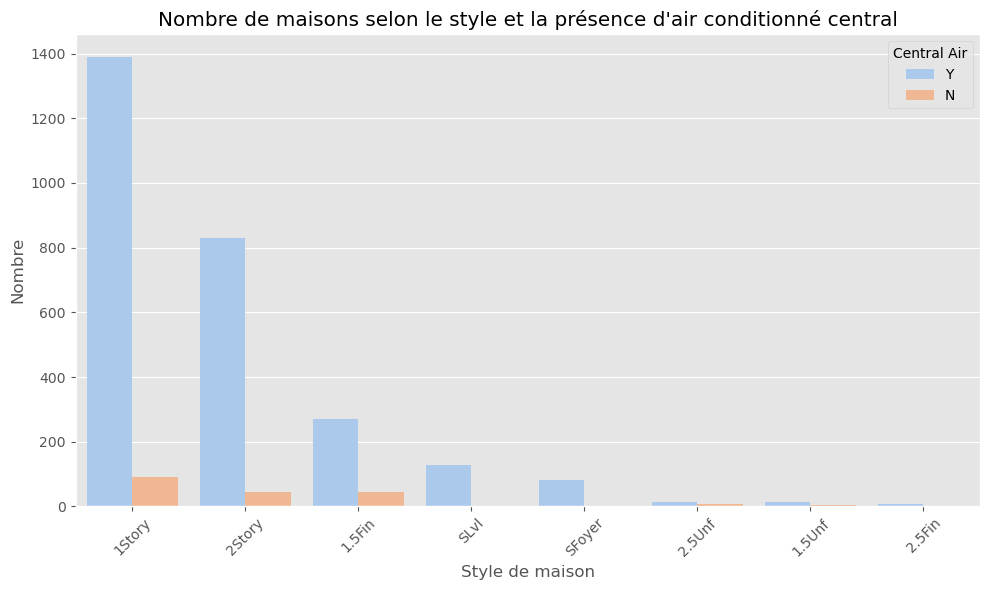

In [ ]:
plt.figure(figsize=(10, 6))

# Barplot groupé par la présence d'air conditionné central
sns.countplot(data=df, x='House Style', hue='Central Air', order=df['House Style'].value_counts().index, palette='pastel')

plt.title("Nombre de maisons selon le style et la présence d'air conditionné central")
plt.xlabel("Style de maison")
plt.ylabel("Nombre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Analyses multivariées

### 1/GrLivArea (surface habitable) vs Neighborhood:

C:\Users\DELL\AppData\Local\Temp\ipykernel_5596\3204045851.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Neighborhood', y='Gr Liv Area', palette='Set2')


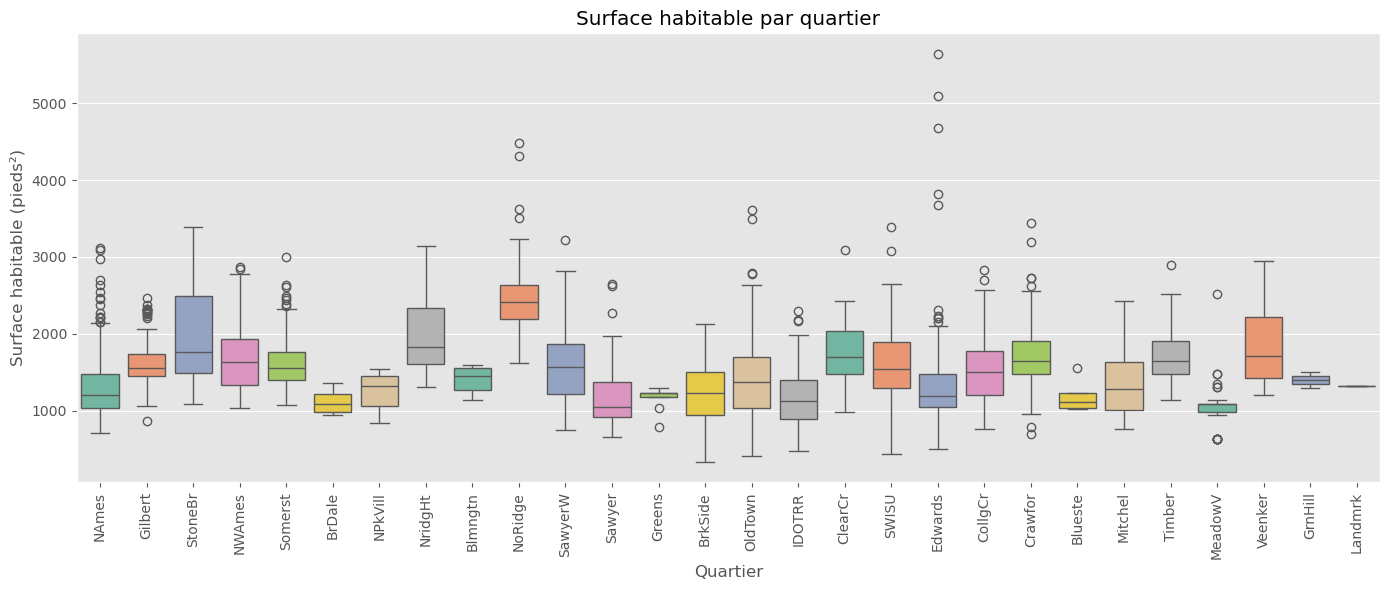

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Neighborhood', y='Gr Liv Area', palette='Set2')
plt.title('Surface habitable par quartier')
plt.xlabel('Quartier')
plt.ylabel('Surface habitable (pieds²)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### <font color=red> -->Le diagramme en boîte montre que certains quartiers comme 'NridgHt' ou 'StoneBr' possèdent des surfaces habitables médianes plus élevées, indiquant des zones résidentielles plus spacieuses. D'autres quartiers comme 'MeadowV' ou 'OldTown' ont des surfaces plus petites en moyenne, avec moins de dispersion. Cela reflète probablement des différences de standing ou de densité d’habitation entre les quartiers.

### 2/SalePrice par HouseStyle, stratifié par CentralAir:

C:\Users\DELL\AppData\Local\Temp\ipykernel_5596\2251805498.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='House Style', y='SalePrice', col='Central Air', kind='box', height=5, aspect=1.2, palette='pastel')


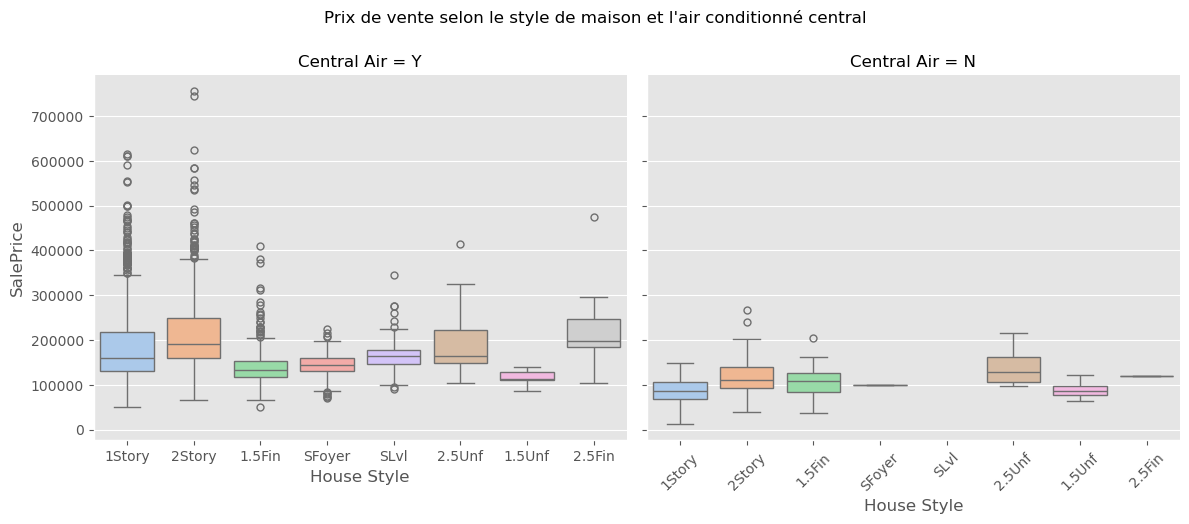

In [ ]:
sns.catplot(data=df, x='House Style', y='SalePrice', col='Central Air', kind='box', height=5, aspect=1.2, palette='pastel')
plt.subplots_adjust(top=0.85)
plt.suptitle("Prix de vente selon le style de maison et l'air conditionné central")
plt.xticks(rotation=45)
plt.show()


#### <font color=red> -->Le graphique montre que, globalement, les maisons équipées d’un air conditionné central (Y) ont des prix de vente médians plus élevés que celles qui n’en ont pas (N), quel que soit le style de maison. Cela suggère que la présence d’un système de climatisation central est un critère valorisant dans l’évaluation du bien. De plus, certains styles comme 2Story et 1Story présentent une grande variation de prix, indiquant une diversité dans leur taille ou leur emplacement.

# K-means

#### Nous allons appliquer l’algorithme de K-Means sur le dataset Ames Housing afin de regrouper les maisons en clusters basés uniquement sur certaines variables numériques continues pertinentes. Le but est de découvrir des groupes de maisons similaires en termes de caractéristiques physiques ou de qualité.
 - Sélection de variables numériques pertinentes.
- Standardisation des données.
- Application de l’algorithme K-Means avec un nombre de clusters fixé (par exemple, 3).
- Visualisation et interprétation des résultats.
#### Variables numériques choisies :
- GrLivArea : Surface habitable.
- TotalBsmtSF : Surface totale du sous-sol.
- OverallQual : Qualité globale de la maison.
- GarageArea : Surface du garage.
- YearBuilt : Année de construction.


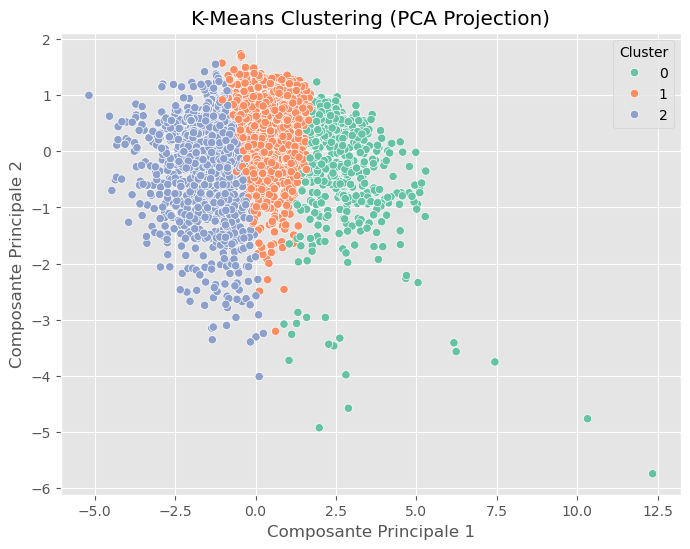

In [ ]:
# 1. Sélection des variables numériques pertinentes
features = ['Gr Liv Area', 'Total Bsmt SF', 'Overall Qual', 'Garage Area', 'Year Built']
data = df[features].dropna()  # On enlève les lignes avec valeurs manquantes

# 2. Standardisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 3. Application de K-Means (k = 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Ajout des étiquettes de clusters au dataset
data['Cluster'] = clusters

# 4. Visualisation avec PCA (2D)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters, palette='Set2')
plt.title('K-Means Clustering (PCA Projection)')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
data.groupby('Cluster').mean().round(2)


,Gr Liv Area,Total Bsmt SF,Overall Qual,Garage Area,Year Built
Cluster,,,,,
0,2128.94,1600.99,8.07,747.09,1997.97
1,1513.99,1066.33,6.37,515.78,1987.23
2,1228.67,812.79,5.02,319.02,1945.06


In [ ]:
data['Cluster'].value_counts()


Cluster
2    1231
1    1196
0     503
Name: count, dtype: int64

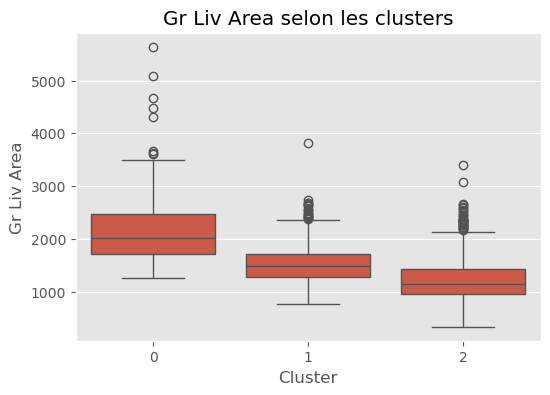

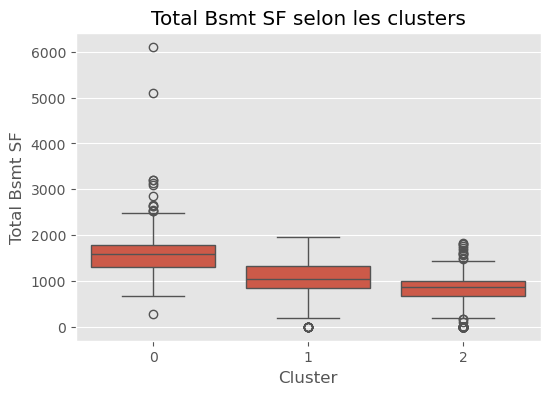

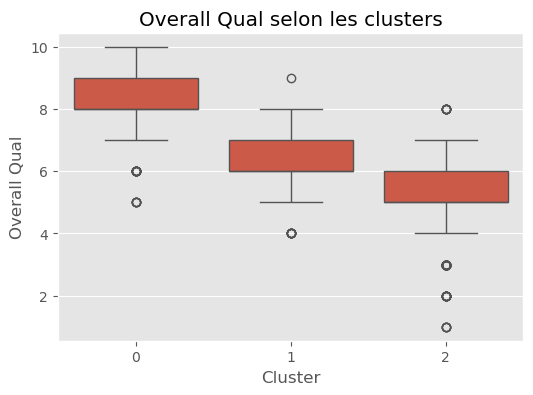

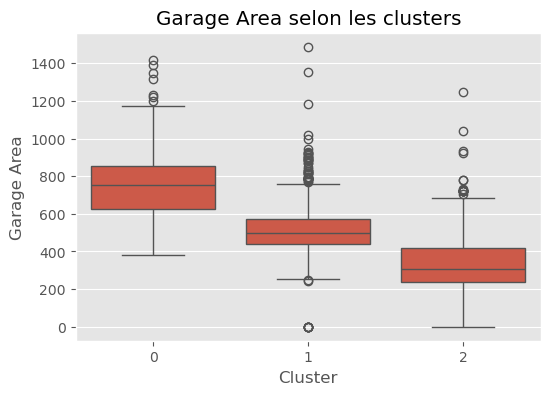

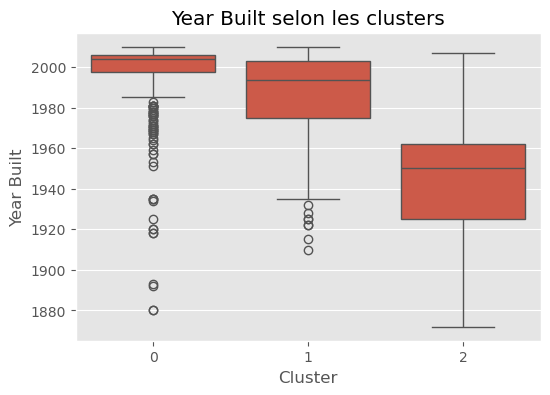

In [ ]:

for col in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Cluster', y=col, data=data)
    plt.title(f'{col} selon les clusters')
    plt.show()


In [ ]:
# Ajouter SalePrice
data['SalePrice'] = df.loc[data.index, 'SalePrice']

# Moyenne des prix par cluster
data.groupby('Cluster')['SalePrice'].mean().round(2)


Cluster
0    309970.04
1    184112.88
2    124791.65
Name: SalePrice, dtype: float64

#### <font color=red> -->Le tableau de contingence montre que les maisons avec une ou plusieurs cheminées ont tendance à présenter une meilleure qualité de sous-sol (BsmtQual) et une condition extérieure (ExterCond) plus favorable, notamment dans les catégories TA (Typique) et Gd (Bonne). À l'inverse, les maisons sans cheminée sont plus nombreuses dans les conditions moyennes ou faibles. Cela suggère qu’un plus grand nombre de cheminées est souvent associé à une meilleure qualité globale de la maison.

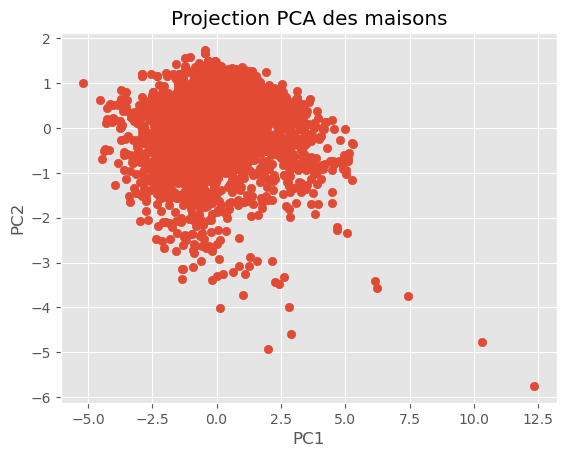

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
proj = pca.fit_transform(scaled_data)

plt.scatter(proj[:, 0], proj[:, 1])
plt.title('Projection PCA des maisons')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


# Classification Ascendante Hiérarchique

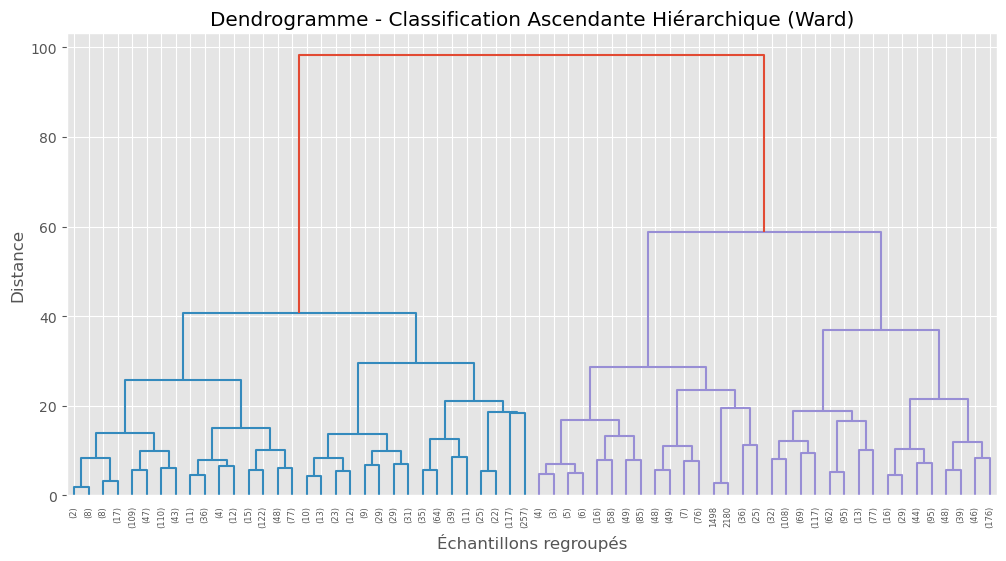

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# 1. Sélection des variables numériques
features = ['Gr Liv Area', 'Total Bsmt SF', 'Overall Qual', 'Garage Area', 'Year Built']
data = df[features].dropna()

# 2. Standardisation
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 3. Calcul des liens hiérarchiques (méthode de Ward)
linked = linkage(scaled_data, method='ward')

# 4. Affichage du dendrogramme
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5, leaf_rotation=90)
plt.title("Dendrogramme - Classification Ascendante Hiérarchique (Ward)")
plt.xlabel("Échantillons regroupés")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

# 5. (Optionnel) Découpage en 3 clusters
cluster_labels = fcluster(linked, t=3, criterion='maxclust')
data['Cluster_CAH'] = cluster_labels

# Merci